In [1]:
import os.path
import yt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import dataAnalysisUtil

import astropy
from astropy import constants as C
import pickle

from scipy.optimize import curve_fit




In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=22)
plt.rc('legend', fontsize=14)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_23015/2168295981.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [3]:
Avog = C.N_A.value
print(Avog)

6.02214076e+23


In [4]:
def get_yt_data_2d(filename):

    k_idx = 0
    fields_list = ["dens", "tele", "tion",
                   "depo", "sumy",
                   # "pres", "temp", "cham", "targ", 
                #    "velx", 
                   "ye"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=data_yt.domain_left_edge, dims=data_yt.domain_dimensions
    )
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        # data_dict[f] = data_yt_map[f][k_idx,:] # careful here about which axis is which
        data_dict[f] = data_yt_map[f]
    return data_dict, time_now

In [5]:
def get_yt_data_3d(filename):

    k_idx = 0
    fields_list = ["dens", "tele", "tion",
                   "depo", "sumy",
                   # "pres", "temp", "cham", "targ", 
                #    "velx", 
                   "ye"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=data_yt.domain_left_edge, dims=data_yt.domain_dimensions
    )
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        # data_dict[f] = data_yt_map[f][k_idx,:] # careful here about which axis is which
        data_dict[f] = data_yt_map[f]
    return data_dict, time_now

In [6]:
filedir = ['/Users/yao/Documents/Data/Gekko2024/4beams/']
# filedir = ['/Users/yao/Documents/Data/Gekko2024/EOS0/']
# filedir = ['/Users/yao/Desktop/gekko3d_t0/'] # initial test, last 1.6 ns.
# filedir = [
    # '/Users/yao/Desktop/gekko3d_t0/',
    # '/Users/yao/Desktop/gekko3d_t1/'
    # ]  # first test, last 2.4 ns.
filename = 'GEKKO_hdf5_plt_cnt_0010'


# data_dict, time_now = get_yt_data_3d(filedir[0]+filename)
data_dict, time_now = get_yt_data_2d(filedir[0]+filename)

yt : [WARNING  ] 2025-09-04 12:29:45,539 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-09-04 12:29:45,564 Parameters: current_time              = 2.0000121285532225e-08
yt : [INFO     ] 2025-09-04 12:29:45,564 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-09-04 12:29:45,565 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-09-04 12:29:45,565 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-09-04 12:29:45,566 Parameters: cosmological_simulation   = 0


In [8]:
dens = data_dict['dens'][:,:,31].T
sumy = data_dict['sumy'][:,:,31].T
ye = data_dict['ye'][:,:,31].T

A = 1.0/sumy
Z = ye/sumy

ne = dens*Avog/A
ni = ne/Z

ne_log = np.log10(ne)
ni_log = np.log10(ni)


IndexError: index 31 is out of bounds for axis 2 with size 1

In [9]:
Z.min()

NameError: name 'Z' is not defined

In [7]:
plt.imshow(
   #  np.log10(dens), 
   #  A,
   #  Z,
    np.log10(ne),
   #  np.log10(ni),
           cmap=newcmap, 
           origin='lower',
        #    interpolation=interpolation, 
           aspect='equal', 
           extent=[0,1,-0.5,0.5],
           vmin=16,
           vmax=22,
           )
plt.xlabel('x (cm)', fontsize=20)
plt.ylabel('y (cm)', fontsize=20)
plt.colorbar(
   #  label=r'$\log_{10}n_e \  (cm^{-3})$', 
    orientation='vertical', pad=0.01, aspect=20)

NameError: name 'ne' is not defined

In [8]:
filedir = ['/Users/yao/Documents/Data/Gekko2024/EOS0/']
filename = 'GEKKO_hdf5_plt_cnt_0010'


# data_dict, time_now = get_yt_data_3d(filedir[0]+filename)

file=dataAnalysisUtil.loadup(filedir[0]+filename)

# dens = data_dict['dens'][:,:,31]

dens,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='dens',resLevel=3)
ye,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='ye',resLevel=3)
sumy,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='sumy',resLevel=3)
Te,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='tele',resLevel=3)
Ti,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='tion',resLevel=3)


A = 1.0/sumy
Z = ye/sumy

ne = dens*Avog/A
ni = ne/Z
ne_log = np.log10(ne)
ni_log = np.log10(ni)

yt : [WARNING  ] 2025-06-25 14:30:40,997 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:30:41,023 Parameters: current_time              = 2.000021609636693e-08
yt : [INFO     ] 2025-06-25 14:30:41,024 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:30:41,024 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:30:41,024 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:30:41,025 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0010
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:30:43,419 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:30:45,826 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:30:47,178 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:30:48,554 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:30:49,942 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


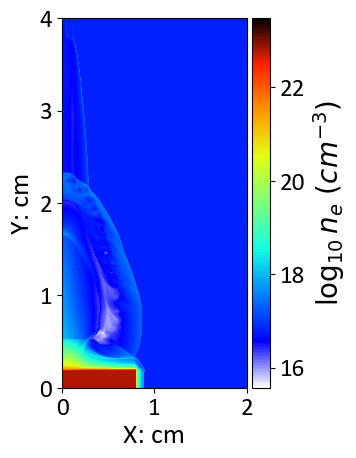

In [9]:
plt.imshow(
           ne_log, 
         #   Te/11600,
           cmap=newcmap, 
        #    interpolation=interpolation, 
           aspect='equal', 
           extent=ext)
plt.xlabel(axisLabels[0], fontsize=20)
plt.ylabel(axisLabels[1], fontsize=20)
plt.colorbar(
    label=r'$\log_{10}n_e \  (cm^{-3})$', 
      # label=r'$T_e \ (eV)$',
    orientation='vertical', pad=0.01, aspect=20)
# plt.savefig('/Users/yao/Desktop/gekko3d_t0_ne.png', dpi=600, bbox_inches='tight')

In [15]:
ne_log.shape

(10240, 5120)

In [11]:
ne_sumz = np.sum(ne, axis=1) # note that the unit now is cm^-2
zz = np.linspace(0, 4, ne_sumz.shape[0])
print(ne_sumz.shape)

(10240,)


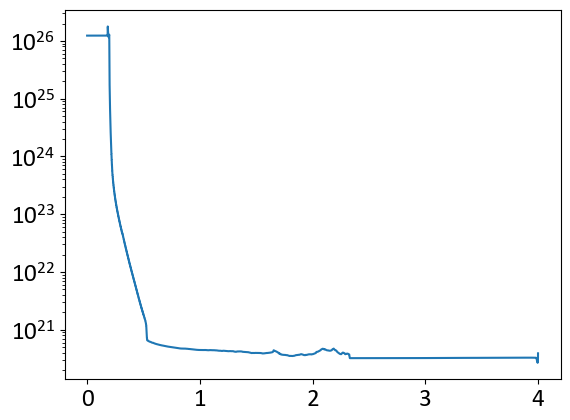

In [12]:
plt.semilogy(zz,ne_sumz[::-1])
# plt.semilogy(zz,dens[::-1])

In [13]:
num_time = 22

ne_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
ni_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
Ti_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
Te_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
Ze_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))
Ae_time_sumz = np.zeros((num_time,ne_sumz.shape[0]))

# ni_z = np.zeros(tt)
# Te_z = np.zeros(tt)
# Ti_z = np.zeros(tt)
# Ze_z = np.zeros(tt)

# Loop through the files and extract data

for i in range(num_time):
    filename = 'GEKKO_hdf5_plt_cnt_' + str(i).zfill(4)
    file=dataAnalysisUtil.loadup(filedir[0]+filename)

    dens,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='dens',resLevel=3)
    # data_dict, time_now = get_yt_data_2d(filedir[0]+filename)
    sumy,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='sumy',resLevel=3)
    ye,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='ye',resLevel=3)
    Te,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='tele',resLevel=3)
    Ti,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='tion',resLevel=3)   
    
    
    # dens = data_dict['dens'][:,:,0].T
    # sumy = data_dict['sumy'][:,:,0].T
    # ye = data_dict['ye'][:,:,0].T
    # Te = data_dict['tele'][:,:,0].T
    # Ti = data_dict['tion'][:,:,0].T

    A = 1.0/sumy
    Z = ye/sumy

    ne = dens*Avog/A
    ni = ne/Z

    ne_time_sumz[i] = np.sum(ne, axis=1)
    ni_time_sumz[i] = np.sum(ni, axis=1)
    Te_time_sumz[i] = np.sum(Te, axis=1)
    Ti_time_sumz[i] = np.sum(Ti, axis=1)
    Ze_time_sumz[i] = np.sum(Z, axis=1)
    Ae_time_sumz[i] = np.sum(A, axis=1)


    



yt : [WARNING  ] 2025-06-25 14:31:49,219 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:31:49,241 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-06-25 14:31:49,241 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:31:49,242 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:31:49,242 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:31:49,243 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0000
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:31:49,496 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:31:49,983 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:31:50,375 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:31:50,773 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:31:51,184 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


KeyboardInterrupt: 

In [20]:
ne_time_sumz.shape

(22, 10240)

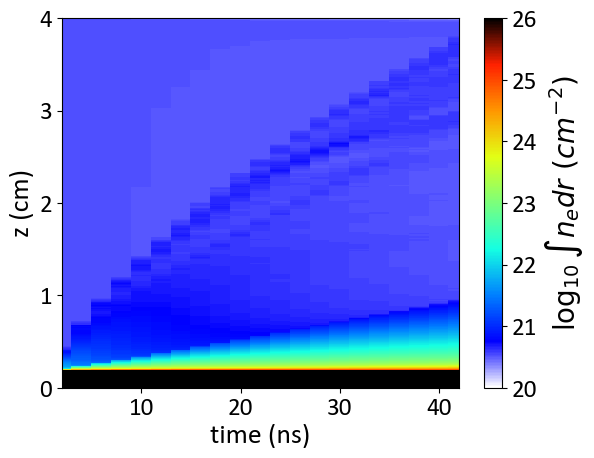

In [24]:
zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

# plt.pcolor(zz,time,np.log10(ne_time_sumz[:,::-1]),
plt.pcolor(time,zz,np.log10(ne_time_sumz[:,::-1].T),
           cmap=newcmap, 
           vmin=20,vmax=26,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(2, (num_time-1)*2)
plt.colorbar(label=r'$\log_{10} \int n_e dr\  (cm^{-2})$',)
plt.savefig('/Users/yao/Desktop/ne_time_sumz2.png', dpi=600, bbox_inches='tight')

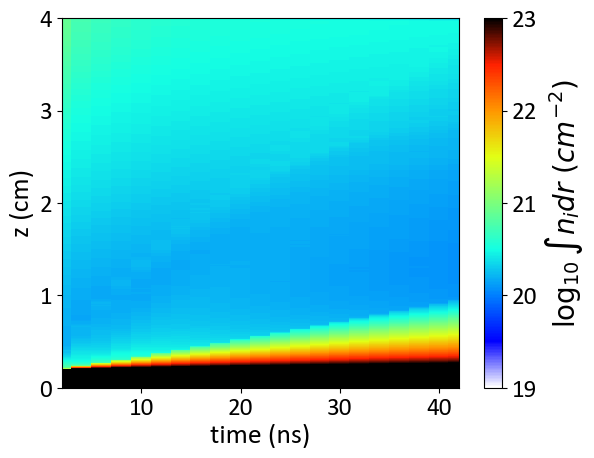

In [27]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

# plt.pcolor(zz,time,np.log10(ne_time_sumz[:,::-1]),
plt.pcolor(time,zz,np.log10(ni_time_sumz[:,::-1].T),
           cmap=newcmap, 
           vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(2, (num_time-1)*2)
plt.colorbar(label=r'$\log_{10} \int n_i dr\  (cm^{-2})$',)
plt.savefig('/Users/yao/Desktop/ni_time_sumz2.png', dpi=600, bbox_inches='tight')

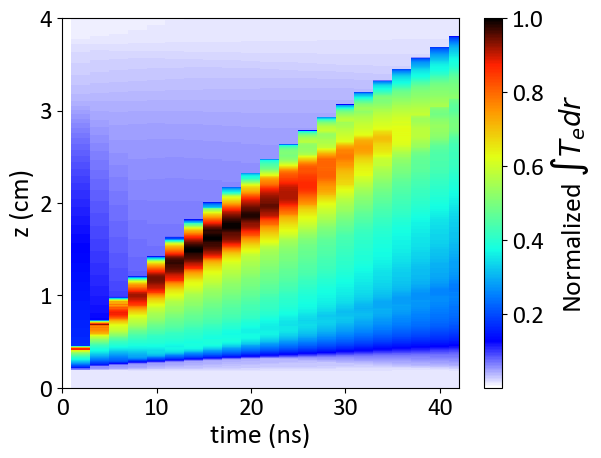

In [31]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

# plt.pcolor(zz,time,(Te_time_sumz[:,::-1]/11600),
plt.pcolor(time,zz,(Te_time_sumz[:,::-1].T)/np.max(Te_time_sumz),
           cmap=newcmap, 
         #   vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'Normalized $\int T_e dr$')
plt.savefig('/Users/yao/Desktop/Te_time_sumz2.png', dpi=600, bbox_inches='tight')

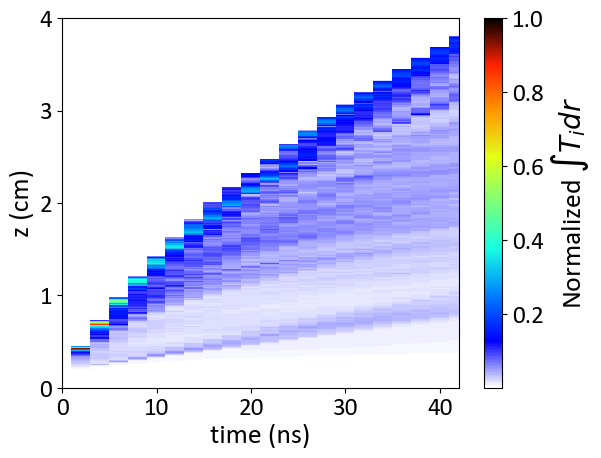

In [33]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,(Ti_time_sumz[:,::-1].T/np.max(Ti_time_sumz)),
           cmap=newcmap, 
        #    vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'Normalized $\int T_i dr$',)
plt.savefig('/Users/yao/Desktop/Ti_time_sumz2.png', dpi=600, bbox_inches='tight')

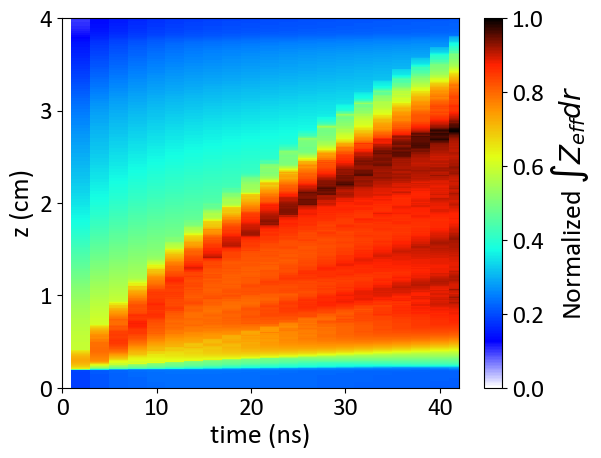

In [35]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,(Ze_time_sumz[:,::-1].T/np.max(Ze_time_sumz)),
           cmap=newcmap, 
        #    vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'Normalized $\int Z_{eff} dr$',)
# plt.savefig('/Users/yao/Desktop/Ze_time_sumz.png', dpi=600, bbox_inches='tight')

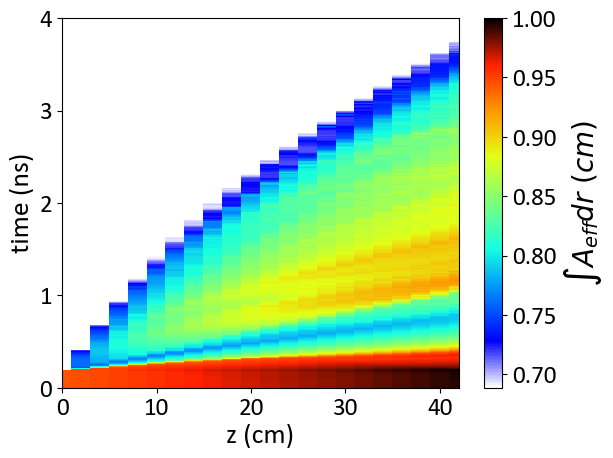

In [36]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, (num_time-1)*2, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time, zz, (Ae_time_sumz[:,::-1].T/np.max(Ae_time_sumz)),
           cmap=newcmap, 
        #    vmin=19,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.xlabel('z (cm)')
plt.ylabel('time (ns)')
plt.xlim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$\int A_{eff} dr\  (cm)$',)
# plt.savefig('/Users/yao/Desktop/Ae_time_sumz.png', dpi=600, bbox_inches='tight')

## Now, we check the results of the lineout on r=0 axis

In [14]:
num_time = 22

ne_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
ni_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
Ti_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
Te_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
Ze_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))
Ae_time_slicez = np.zeros((num_time,ne_sumz.shape[0]))

# ni_z = np.zeros(tt)
# Te_z = np.zeros(tt)
# Ti_z = np.zeros(tt)
# Ze_z = np.zeros(tt)

# Loop through the files and extract data

for i in range(num_time):
    filename = 'GEKKO_hdf5_plt_cnt_' + str(i).zfill(4)
    # data_dict, time_now = get_yt_data_2d(filedir[0]+filename)

    file=dataAnalysisUtil.loadup(filedir[0]+filename)

    dens,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='dens',resLevel=3)
    # data_dict, time_now = get_yt_data_2d(filedir[0]+filename)
    sumy,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='sumy',resLevel=3)
    ye,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='ye',resLevel=3)
    Te,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='tele',resLevel=3)
    Ti,axisLabels,name,colormap,title,interpolation,ext = dataAnalysisUtil.plot2DDS(file, 2, 0.0, 'full domain', field='tion',resLevel=3)   
    
    

    # dens = data_dict['dens'][:,:,0].T
    # sumy = data_dict['sumy'][:,:,0].T
    # ye = data_dict['ye'][:,:,0].T
    # Te = data_dict['tele'][:,:,0].T
    # Ti = data_dict['tion'][:,:,0].T

    A = 1.0/sumy
    Z = ye/sumy

    ne = dens*Avog/A
    ni = ne/Z

    ne_time_slicez[i] = ne[:,0] # take the first column, which is the z=0 slice
    ni_time_slicez[i] = ni[:,0] # take the first column, which is the z=0 slice
    Te_time_slicez[i] = Te[:,0] # take the first column, which is the z=0 slice
    Ti_time_slicez[i] = Ti[:,0] # take the first column, which is the z=0 slice
    Ze_time_slicez[i] = Z[:,0] # take the first column, which is the z=0 slice
    Ae_time_slicez[i] = A[:,0] # take the first column, which is the z=0 slice



    



yt : [WARNING  ] 2025-06-25 14:32:03,443 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:03,466 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-06-25 14:32:03,467 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:03,467 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:03,468 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:03,468 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0000
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:03,720 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:04,199 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:04,589 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:04,980 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:05,375 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:32:05,998 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:06,014 Parameters: current_time              = 2.000601423840212e-09
yt : [INFO     ] 2025-06-25 14:32:06,015 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:06,015 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:06,015 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:06,016 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0001
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:06,928 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:07,709 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:08,238 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:08,780 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:09,331 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:32:10,152 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:10,168 Parameters: current_time              = 4.0005972196954876e-09
yt : [INFO     ] 2025-06-25 14:32:10,169 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:10,169 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:10,169 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:10,170 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0002
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:11,263 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:12,288 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:12,947 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:13,605 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:14,289 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:32:15,151 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:15,169 Parameters: current_time              = 6.000339018927263e-09
yt : [INFO     ] 2025-06-25 14:32:15,169 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:15,169 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:15,169 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:15,170 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0003
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:16,323 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:17,558 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:18,340 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:19,108 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:19,880 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:32:20,856 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:20,872 Parameters: current_time              = 8.000556549529028e-09
yt : [INFO     ] 2025-06-25 14:32:20,873 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:20,873 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:20,873 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:20,874 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0004
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:22,269 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:23,629 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:24,471 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:25,295 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:26,129 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:32:27,198 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:27,243 Parameters: current_time              = 1.0000715435141028e-08
yt : [INFO     ] 2025-06-25 14:32:27,244 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:27,244 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:27,245 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:27,245 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0005
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:28,879 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:30,464 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:31,406 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:32,351 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:33,289 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:32:34,474 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:34,519 Parameters: current_time              = 1.2000685959839349e-08
yt : [INFO     ] 2025-06-25 14:32:34,520 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:34,520 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:34,520 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:34,521 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0006
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:36,383 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:38,220 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:39,234 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:40,241 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:41,260 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:32:42,563 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:42,581 Parameters: current_time              = 1.400027967830226e-08
yt : [INFO     ] 2025-06-25 14:32:42,581 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:42,581 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:42,582 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:42,582 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0007
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:44,504 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:46,435 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:47,583 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:48,707 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:49,837 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:32:51,230 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:32:51,246 Parameters: current_time              = 1.6000547789226644e-08
yt : [INFO     ] 2025-06-25 14:32:51,247 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:32:51,247 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:32:51,247 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:32:51,248 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0008
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:32:53,330 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:55,395 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:56,555 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:57,736 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:32:58,949 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:33:00,450 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:33:00,466 Parameters: current_time              = 1.8000243534622232e-08
yt : [INFO     ] 2025-06-25 14:33:00,467 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:33:00,468 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:33:00,468 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:33:00,468 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0009
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:33:02,849 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:05,164 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:06,479 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:07,831 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:09,117 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:33:10,623 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:33:10,643 Parameters: current_time              = 2.000021609636693e-08
yt : [INFO     ] 2025-06-25 14:33:10,644 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:33:10,644 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:33:10,645 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:33:10,645 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0010
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:33:13,115 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:15,537 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:16,898 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:18,286 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:19,666 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:33:21,291 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:33:21,307 Parameters: current_time              = 2.2000431524913243e-08
yt : [INFO     ] 2025-06-25 14:33:21,308 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:33:21,308 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:33:21,308 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:33:21,309 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0011
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:33:23,893 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:27,054 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:28,493 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:29,958 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:31,416 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:33:33,136 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:33:33,155 Parameters: current_time              = 2.400009353595365e-08
yt : [INFO     ] 2025-06-25 14:33:33,155 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:33:33,156 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:33:33,156 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:33:33,157 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0012
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:33:36,055 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:38,766 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:40,273 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:41,789 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:43,315 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:33:45,129 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:33:45,147 Parameters: current_time              = 2.600026712642382e-08
yt : [INFO     ] 2025-06-25 14:33:45,147 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:33:45,148 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:33:45,148 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:33:45,148 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0013
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:33:48,216 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:51,142 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:52,738 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:54,358 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:33:56,004 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:33:58,059 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:33:58,075 Parameters: current_time              = 2.800109469644794e-08
yt : [INFO     ] 2025-06-25 14:33:58,076 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:33:58,076 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:33:58,077 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:33:58,077 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0014
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:34:01,321 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:04,321 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:05,965 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:07,623 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:09,266 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:34:11,162 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:34:11,179 Parameters: current_time              = 3.000011576143623e-08
yt : [INFO     ] 2025-06-25 14:34:11,179 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:34:11,179 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:34:11,180 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:34:11,180 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0015
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:34:14,355 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:17,470 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:19,186 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:20,908 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:22,629 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [WARNING  ] 2025-06-25 14:34:24,576 Extending theta dimension to 2PI + left edge.


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [INFO     ] 2025-06-25 14:34:24,671 Parameters: current_time              = 3.2000661169191004e-08
yt : [INFO     ] 2025-06-25 14:34:24,671 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:34:24,672 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:34:24,672 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:34:24,673 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0016
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:34:28,051 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:31,342 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:33,126 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:34,918 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:36,704 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [WARNING  ] 2025-06-25 14:34:38,696 Extending theta dimension to 2PI + left edge.


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [INFO     ] 2025-06-25 14:34:38,790 Parameters: current_time              = 3.4001180063648496e-08
yt : [INFO     ] 2025-06-25 14:34:38,791 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:34:38,791 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:34:38,791 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:34:38,792 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0017
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:34:42,465 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:45,891 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:47,782 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:49,671 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:34:51,559 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [WARNING  ] 2025-06-25 14:34:53,653 Extending theta dimension to 2PI + left edge.


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [INFO     ] 2025-06-25 14:34:53,670 Parameters: current_time              = 3.600000981373843e-08
yt : [INFO     ] 2025-06-25 14:34:53,671 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:34:53,671 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:34:53,671 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:34:53,671 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0018
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:34:57,334 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:00,912 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:02,856 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:04,796 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:06,729 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:35:09,006 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:35:09,024 Parameters: current_time              = 3.800058924291678e-08
yt : [INFO     ] 2025-06-25 14:35:09,024 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:35:09,025 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:35:09,025 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:35:09,026 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0019
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:35:12,957 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:16,765 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:18,800 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:20,825 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:22,845 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [WARNING  ] 2025-06-25 14:35:25,071 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-06-25 14:35:25,089 Parameters: current_time              = 4.00004715917342e-08
yt : [INFO     ] 2025-06-25 14:35:25,089 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:35:25,089 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:35:25,090 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:35:25,090 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0020
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:35:29,345 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:33,248 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:35,353 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:37,426 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:39,529 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [WARNING  ] 2025-06-25 14:35:41,820 Extending theta dimension to 2PI + left edge.


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


yt : [INFO     ] 2025-06-25 14:35:41,836 Parameters: current_time              = 4.200119786007522e-08
yt : [INFO     ] 2025-06-25 14:35:41,837 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-06-25 14:35:41,837 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-25 14:35:41,837 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-06-25 14:35:41,838 Parameters: cosmological_simulation   = 0


Loaded up /Users/yao/Documents/Data/Gekko2024/EOS0/GEKKO_hdf5_plt_cnt_0021
This may take a few moments
Generating slice along axis 2 


yt : [INFO     ] 2025-06-25 14:35:45,969 Making a fixed resolution buffer of (dens) 10240 by 5120


Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:50,087 Making a fixed resolution buffer of (sumy) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:52,283 Making a fixed resolution buffer of (ye) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:54,456 Making a fixed resolution buffer of (tele) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array


yt : [INFO     ] 2025-06-25 14:35:56,665 Making a fixed resolution buffer of (tion) 10240 by 5120


Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field
This may take a few moments
Generating slice along axis 2 
Generating fixed resolution buffer
Returning Numpy array
Full domain for 2 is:  [unyt_quantity(0., 'code_length'), unyt_quantity(2., 'code_length'), unyt_quantity(0., 'code_length'), unyt_quantity(4., 'code_length')]
Fetching units for field


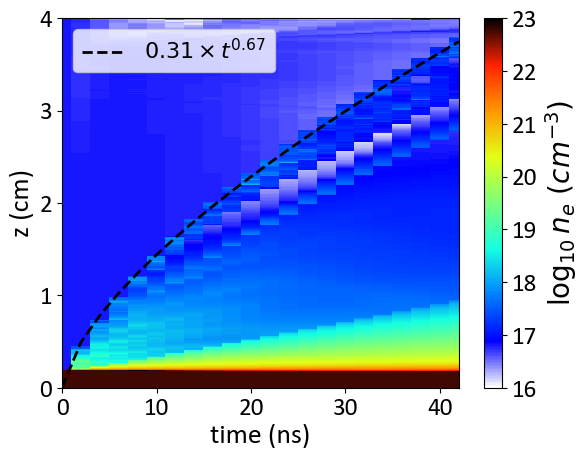

In [51]:
zz = np.linspace(0, 4, ne_time_slicez.shape[1]) # in z axis, 4 cm
time = np.linspace(0, (num_time-1)*2, (num_time)) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,np.log10(ne_time_slicez[:,::-1].T),
           cmap=newcmap, 
           vmin=16,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$\log_{10} n_e\  (cm^{-3})$',)

aa = 0.31
bb = 2./3.
ana = aa*time**(bb)
plt.plot(time, ana, 'k--', 
         lw=2,
         label=fr'${aa}\times t^{{{bb:.2f}}}$')
plt.legend(loc='upper left', fontsize=16)

plt.savefig('/Users/yao/Desktop/ne_time_slicez2.png', dpi=600, bbox_inches='tight')

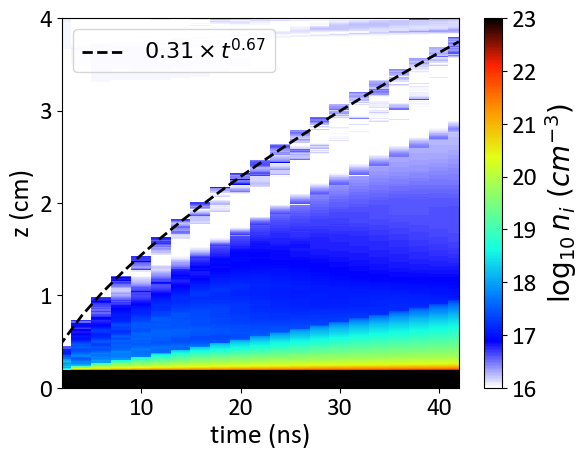

In [49]:
# zz = np.linspace(0, 4, ne_time_slicez.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, (num_time-1)*2, (num_time)) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,np.log10(ni_time_slicez[:,::-1].T),
           cmap=newcmap, 
           vmin=16,vmax=23,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(2, (num_time-1)*2)
plt.colorbar(label=r'$\log_{10} n_i\  (cm^{-3})$',)

aa = 0.31
bb = 2./3.
ana = aa*time**(bb)
plt.plot(time, ana, 'k--', 
         lw=2,
         label=fr'${aa}\times t^{{{bb:.2f}}}$')
plt.legend(loc='upper left', fontsize=16)

plt.savefig('/Users/yao/Desktop/ni_time_slicez2.png', dpi=600, bbox_inches='tight')

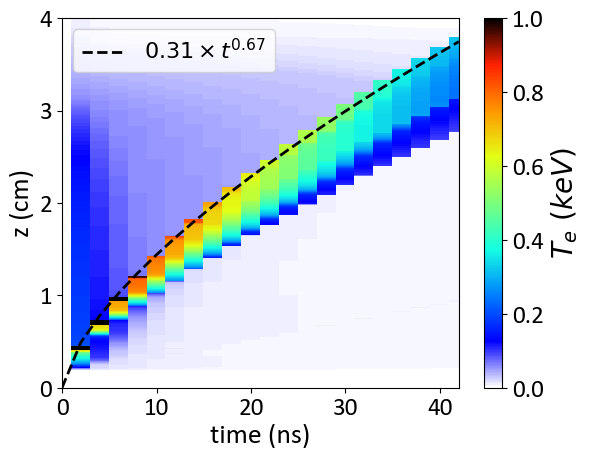

In [47]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, 42, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,((Te_time_slicez[:,::-1].T)/11600/1e3),
           cmap=newcmap, 
           vmin=0,vmax=1,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$T_e\  (keV)$',)

aa = 0.31
bb = 2./3.
ana = aa*time**(bb)
plt.plot(time, ana, 'k--', 
         lw=2,
         label=fr'${aa}\times t^{{{bb:.2f}}}$')
plt.legend(loc='upper left', fontsize=16)

plt.savefig('/Users/yao/Desktop/Te_time_slicez2.png', dpi=600, bbox_inches='tight')

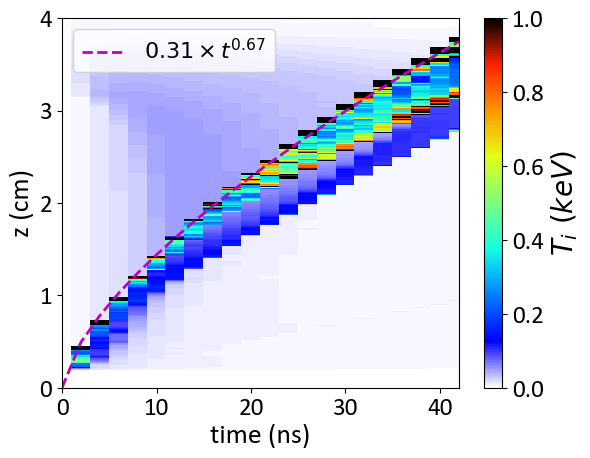

In [45]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, 42, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,((Ti_time_slicez[:,::-1].T)/11600/1e3),
           cmap=newcmap, 
           vmin=0,vmax=1,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$T_i\  (keV)$',)

aa = 0.31
bb = 2./3.
ana = aa*time**(bb)
plt.plot(time, ana, 'm--', 
         lw=2,
         label=fr'${aa}\times t^{{{bb:.2f}}}$')
plt.legend(loc='upper left', fontsize=16)

plt.savefig('/Users/yao/Desktop/Ti_time_slicez2.png', dpi=600, bbox_inches='tight')

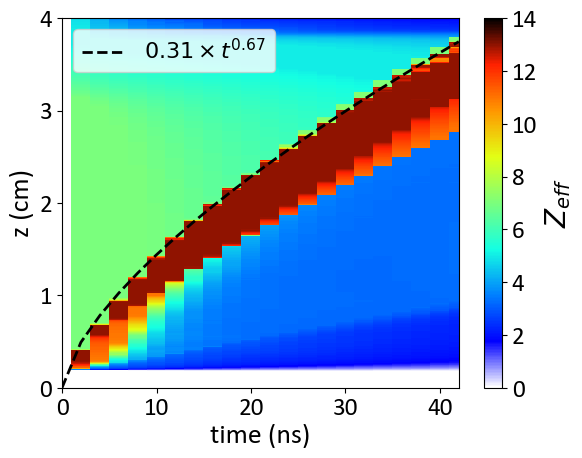

In [40]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, 42, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,(Ze_time_slicez[:,::-1].T),
           cmap=newcmap, 
           vmin=0,vmax=14,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.ylim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$Z_{eff}$',)

aa = 0.31
bb = 2./3.
ana = aa*time**(bb)
plt.plot(time, ana, 'k--', 
         lw=2,
         label=fr'${aa}\times t^{{{bb:.2f}}}$')
plt.legend(loc='upper left', fontsize=16)

plt.savefig('/Users/yao/Desktop/Ze_time_slicez2.png', dpi=600, bbox_inches='tight')

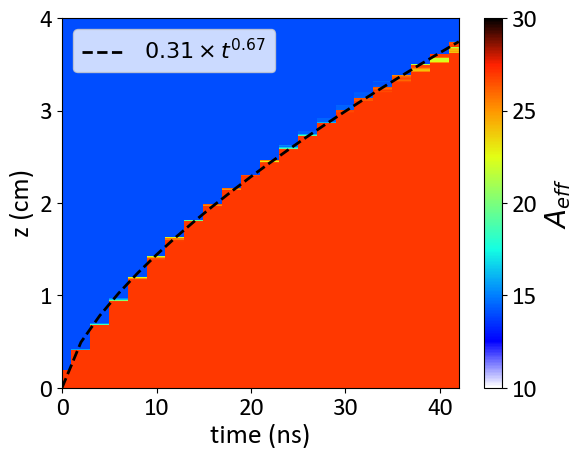

In [38]:
# zz = np.linspace(0, 4, ne_time_sumz.shape[1]) # in z axis, 4 cm
# time = np.linspace(0, 42, num_time) # here we have 42 ns in the 21st time step

plt.pcolor(time,zz,(Ae_time_slicez[:,::-1].T),
           cmap=newcmap, 
           vmin=10,vmax=30,
        #    interpolation=interpolation, 
        #    aspect='auto', 
        #    extent=[0, 4, 0, 42],
           )
plt.ylabel('z (cm)')
plt.xlabel('time (ns)')
plt.xlim(0, 4)
plt.xlim(0, (num_time-1)*2)
plt.colorbar(label=r'$A_{eff}$',)

aa = 0.31
bb = 2./3.
ana = aa*time**(bb)
plt.plot(time, ana, 'k--', 
         lw=2,
         label=fr'${aa}\times t^{{{bb:.2f}}}$')
plt.legend(loc='upper left', fontsize=16)
plt.savefig('/Users/yao/Desktop/Ae_time_slicez2.png', dpi=600, bbox_inches='tight')

In [13]:
## check the laser absorption

# wkdir = filedir
wkdir = ['/Users/yao/Desktop/t1/',   # 1 beam
         '/Users/yao/Desktop/t2/']

file  = 'GEKKO_LaserEnergyProfile.dat'

time_s            = []  # Initialize as an empty list
energy_abs_erg_s  = []  # Initialize as an empty list
energy_in_erg_s   = []  # Initialize as an empty list
energy_out_erg_s  = []  # Initialize as an empty list

for i in range(len(wkdir)):
    data = wkdir[i] + file
    print(data)
    time           = np.loadtxt(data)[:,1]
    energy_in_erg  = np.loadtxt(data)[:,3]
    energy_out_erg = np.loadtxt(data)[:,4]
    
    time_s.append(time)  # Append the result to the list 
    energy_in_erg_s.append(energy_in_erg)  # Append the result to the list
    energy_out_erg_s.append(energy_out_erg)  # Append the result to the list
    energy_abs_erg_s.append(energy_in_erg - energy_out_erg)  # Append the result to the list

# time_s         = np.loadtxt(wkdir+file)[:,1]
# energy_in_erg  = np.loadtxt(wkdir+file)[:,3]
# energy_out_erg = np.loadtxt(wkdir+file)[:,4]

/Users/yao/Desktop/t1/GEKKO_LaserEnergyProfile.dat
/Users/yao/Desktop/t2/GEKKO_LaserEnergyProfile.dat


In [14]:
time_s[1].size

1762

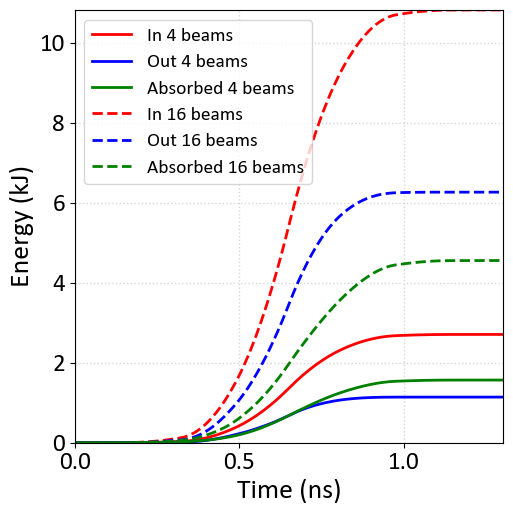

In [18]:
## Now we do the lineout of the data

width  = 3.487 * 1.5
height = width #* 0.618 #* 0.8

fig, axs = plt.subplots(1, 1, sharex=True)

axs.plot(time_s[0]*1e9, energy_in_erg_s[0]*1e-7/1e3, '-r', lw=2, label='In 4 beams')
axs.plot(time_s[0]*1e9, energy_out_erg_s[0]*1e-7/1e3, '-b', lw=2, label='Out 4 beams')
axs.plot(time_s[0]*1e9, energy_abs_erg_s[0]*1e-7/1e3, '-g', lw=2, label='Absorbed 4 beams')

axs.plot(time_s[1]*1e9, energy_in_erg_s[1]*1e-7/1e3, '--r', lw=2, label='In 16 beams')
axs.plot(time_s[1]*1e9, energy_out_erg_s[1]*1e-7/1e3, '--b', lw=2, label='Out 16 beams')
axs.plot(time_s[1]*1e9, energy_abs_erg_s[1]*1e-7/1e3, '--g', lw=2, label='Absorbed 16 beams')
axs.set_ylabel('Energy (kJ)')
axs.set_xlabel('Time (ns)')
axs.grid(which='both', alpha=0.5,linestyle=':', lw=1.0)
axs.legend()
# axs.set_yscale('log')
axs.set_xlim([0,time_s[0].max()*1e9])
axs.set_ylim([0,energy_in_erg_s[1].max()*1e-7/1e3])
# axs.set_ylim([1e-1,1e4])

fig.set_size_inches(width, height)
fig.tight_layout()

In [57]:
fig.savefig('/Users/yao/Desktop/Energy_budget.png',dpi=600)

(0.0, 40.0)

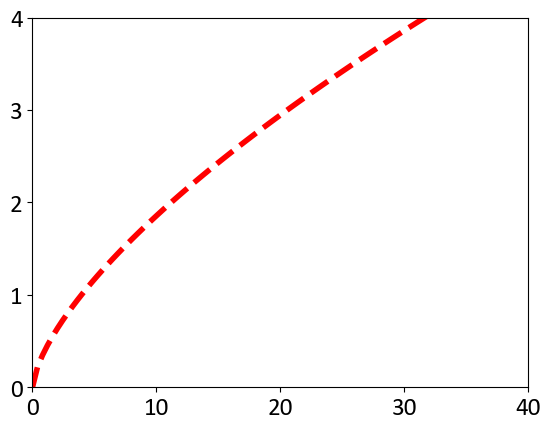

In [13]:
zz = np.linspace(0, 4, 100) # in z axis, 4 cm
time = np.linspace(0, 40, 100) # here we have 42 ns in the 21st time step

aa = 0.4
bb = 2./3.
ana = aa*time**(bb)
plt.plot(time, ana, 'r--', 
         lw=4,
         label=fr'${aa}\times t^{{{bb:.2f}}}$')
plt.ylim(0, 4)
plt.xlim(0, 40)
# plt.legend(loc='upper left', fontsize=16)

# plt.savefig('/Users/yao/Desktop/ne_time_slicez2.png', dpi=600, bbox_inches='tight')

In [20]:
energy_abs_erg_s[1]*1e-7/1e3

array([5.47331890e-11, 4.29533652e-10, 7.10854844e-10, ...,
       4.55488459e+00, 4.55488469e+00, 4.55488472e+00])